### Learning Curve and Learning Rate Decay

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# x and y are placeholders for our training data
x = tf.placeholder("float")
y = tf.placeholder("float")
# w is the variable storing our values. It is initialised with starting "guesses"
# w[0] is the "a" in our equation, w[1] is the "b"
w = tf.Variable([1.0, 2.0], name="w")
# Our model of y = a*x + b
y_model = tf.mul(x, w[0]) + w[1]

# Our error is defined as the square of the differences
error = tf.square(y - y_model)

In [6]:
# The Gradient Descent Optimizer does the heavy lifting
global_step = tf.Variable(0, trainable=False)
init_learning_rate = 0.01
decay_learning_rate = tf.train.exponential_decay(init_learning_rate, global_step, 10, 0.9, staircase=True)
#train_op = tf.train.GradientDescentOptimizer(init_learning_rate).minimize(error)
train_op = tf.train.GradientDescentOptimizer(decay_learning_rate).minimize(error, global_step=global_step)

# Normal TensorFlow - initialize values, create a session and run the model
model = tf.global_variables_initializer()

errors = []
with tf.Session() as session:
    session.run(model)
    for i in range(100):
        x_train = tf.random_normal((1,), mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value, y_value = session.run([x_train, y_train])
        _, error_value = session.run([train_op, error], feed_dict={x: x_value, y: y_value})
        print("Iteration :{a:3d},    Error : {b:5.5f}".format(a=i, b=error_value[0]))
        errors.append(error_value)
    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))


Iteration :  0,    Error : 98.45084
Iteration :  1,    Error : 9.87113
Iteration :  2,    Error : 8.20545
Iteration :  3,    Error : 2.48245
Iteration :  4,    Error : 9.87326
Iteration :  5,    Error : 5.84021
Iteration :  6,    Error : 6.60355
Iteration :  7,    Error : 1.12021
Iteration :  8,    Error : 0.72825
Iteration :  9,    Error : 0.40259
Iteration : 10,    Error : 1.47652
Iteration : 11,    Error : 0.31141
Iteration : 12,    Error : 3.77790
Iteration : 13,    Error : 0.05251
Iteration : 14,    Error : 4.13647
Iteration : 15,    Error : 25.97292
Iteration : 16,    Error : 11.25402
Iteration : 17,    Error : 9.86255
Iteration : 18,    Error : 2.45489
Iteration : 19,    Error : 0.29305
Iteration : 20,    Error : 0.37571
Iteration : 21,    Error : 4.18918
Iteration : 22,    Error : 1.54959
Iteration : 23,    Error : 9.57429
Iteration : 24,    Error : 0.97009
Iteration : 25,    Error : 9.80473
Iteration : 26,    Error : 0.62020
Iteration : 27,    Error : 1.24963
Iteration : 28,  

C:\Users\kyuhw\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\kyuhw\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


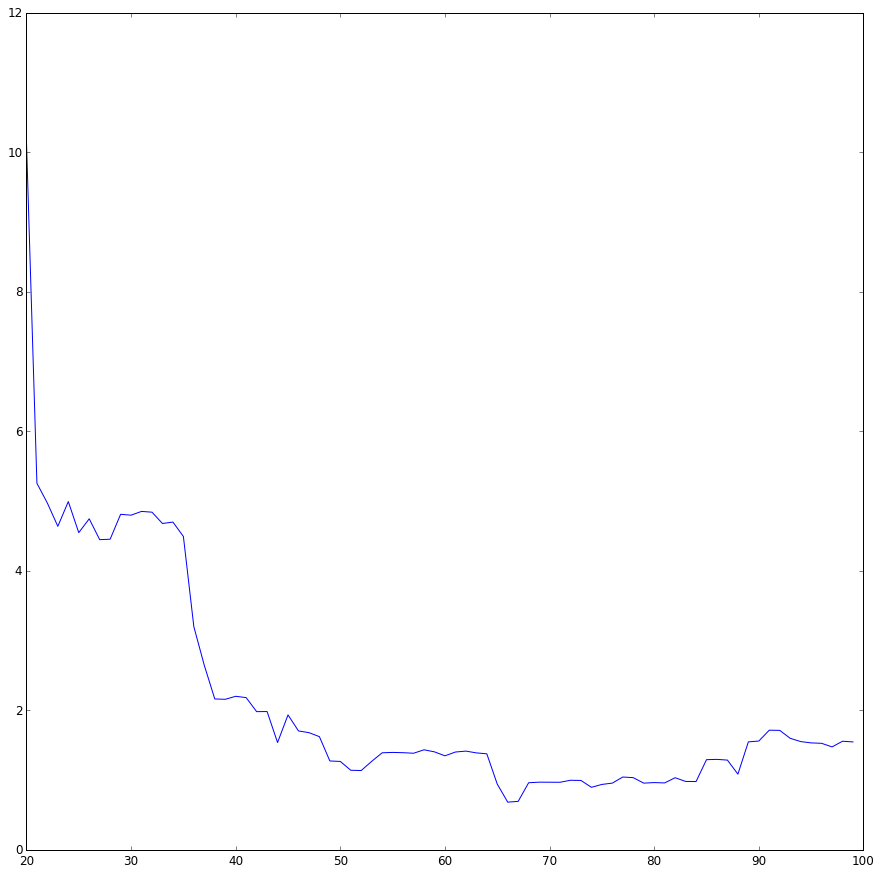

In [7]:
import matplotlib.pyplot as plt
plt.plot([np.mean(errors[i-20:i]) for i in range(len(errors))])
plt.show()

[TensorFlow Optimizers](https://www.tensorflow.org/api_docs/python/train/optimizers)

[TensorFlow Regularizers](https://www.tensorflow.org/api_docs/python/contrib.layers/regularizers)